# Proyek Analisis Data: Bike Sharing
- **Nama:** Anisa Febrianti
- **Email:** anisafe2002@gamil.com
- **ID Dicoding:** A547XBF061

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewa sepeda?
- Hari mana dalam seminggu (Senin-Minggu) yang secara konsisten memiliki jumlah pelanggan tertinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/data_1.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("/content/data_2.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Variasi Jumlah Penyewa: Jumlah penyewa sepeda (cnt) bervariasi setiap harinya, dengan jumlah tertinggi pada tanggal 2011-01-05 (1600 penyewa).
- Variasi Jumlah Penyewa: Jumlah penyewa sepeda (cnt) bervariasi setiap jamnya, dengan jumlah tertinggi pada tanggal 2011-01-01 di jam pertama (40 penyewa).

### Assessing Data

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print('jumlah duplikasi: ', day_df.duplicated().sum())
day_df.describe()

jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print('jumlah duplikasi: ', hour_df.duplicated().sum())
hour_df.describe()

jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- terdapat kesalahan tipe data untuk kolom dteday untuk di data perhari
- terdapat kesalahan tipe data untuk kolom dteday untuk di data perjam

### Cleaning Data

In [8]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- data type pada data perhari berhasil di ubah menjadi date time
- data type pada data perjam berhasil di ubah menjadi date time

## Exploratory Data Analysis (EDA)

### Explore day & hour

In [11]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [14]:
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

instant mnth                         
       nunique  max min       mean       std
season                                      
1          181   12   1   3.093923  3.403759
2          184    6   3   4.652174  0.951671
3          188    9   6   7.691489  0.948137
4          178   12   9  10.696629  0.919402

In [16]:
day_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

,instant
workingday,
1,500
0,231


In [20]:
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

,instant
weathersit,
1,463
2,247
3,21


In [21]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [22]:
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

instant mnth                         
       nunique  max min       mean       std
season                                      
1         4242   12   1   3.119755  3.411534
2         4409    6   3   4.654117  0.948483
3         4496    9   6   7.689724  0.946649
4         4232   12   9  10.702505  0.918886

In [23]:
hour_df.groupby(by="weekday").instant.nunique().sort_values(ascending=False)
hour_df.groupby(by="workingday").instant.nunique().sort_values(ascending=False)

,instant
workingday,
1,11865
0,5514


In [24]:
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

,instant
weathersit,
1,11413
2,4544
3,1419
4,3


In [25]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="dteday",
    right_on="dteday"
    )
all_df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [28]:
all_df.groupby(by=["season_x", "weathersit_x"]).agg({
    "cnt_x": "sum",
})

cnt_x
season_x weathersit_x          
1        1              7403153
         2              3691552
         3                84442
2        1             15034838
         2              6905065
         3                84168
3        1             19151581
         2              6009606
         3               259616
4        1             12453183
         2              7245992
         3               467854

In [29]:
all_df.groupby(by=["season_y", "weathersit_y"]).agg({
    "cnt_y": "sum",
})

cnt_y
season_y weathersit_y        
1        1             325278
         2             124205
         3              21642
         4                223
2        1             664463
         2             207363
         3              46763
3        1             801941
         2             212932
         3              46256
4        1             546491
         2             251452
         3              43670

In [32]:
all_df.groupby(by=["season_x"]).agg({
    "weekday_x": "sum",
    "workingday_x": "sum",
    "cnt_x": "sum"
})

,weekday_x,workingday_x,cnt_x
season_x,,,
1,12763,2794,11179147
2,13190,3066,22024071
3,13637,3141,25420803
4,12611,2864,20167029


In [33]:
all_df.groupby(by=["season_y"]).agg({
    "weekday_y": "sum",
    "workingday_y": "sum",
    "cnt_y": "sum"
})

,weekday_y,workingday_y,cnt_y
season_y,,,
1,12763,2794,471348
2,13190,3066,918589
3,13637,3141,1061129
4,12611,2864,841613


**Insight:**
- Berdasarkan pivot table di atas untuk data perhari, dapat diketahui bahwa pelanggan yang menyewa sepeda paling banyak pada musim ke 3, berdasarkan hari pada weekday dan pada kondisi cuaca yang pertama.
- Berdasarkan pivot table di atas untuk data perjam, dapat diketahui bahwa pelanggan yang menyewa sepeda paling banyak pada musim ke 3, berdasarkan hari pada weekday dan pada kondisi cuaca yang pertama.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewa sepeda?

In [34]:
sum_day_df = all_df.groupby("weathersit_x").cnt_x.sum().sort_values(ascending=False).reset_index()
sum_day_df.head(15)

,weathersit_x,cnt_x
0,1,54042755
1,2,23852215
2,3,896080


In [35]:
sum_day_df = all_df.groupby("weathersit_y").cnt_y.sum().sort_values(ascending=False).reset_index()
sum_day_df.head(15)

,weathersit_y,cnt_y
0,1,2338173
1,2,795952
2,3,158331
3,4,223


<ipython-input-51-9725ecba044d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-51-9725ecba044d>:3: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(


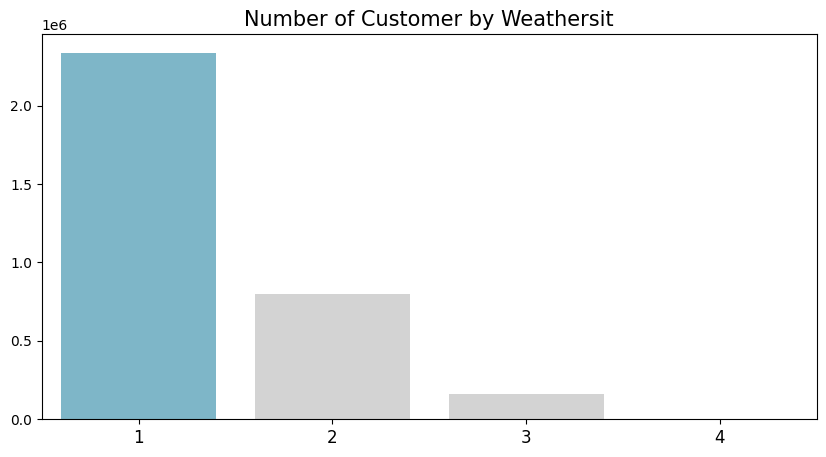

In [ ]:
plt.figure(figsize=(10, 5))

colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="cnt_y",
    x="weathersit_y",
    data=sum_day_df.sort_values(by="cnt_y", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Weathersit", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

### Pertanyaan 2: Hari mana dalam seminggu (Senin-Minggu) yang secara konsisten memiliki jumlah pelanggan tertinggi?

In [55]:
sum_day_df = all_df.groupby("weekday_y").cnt_y.sum().sort_values(ascending=False).reset_index()
sum_day_df.head(15)

,weekday_y,cnt_y
0,5,487790
1,4,485395
2,6,477807
3,3,473048
4,2,469109
5,1,455503
6,0,444027


<ipython-input-56-d6afb2a8a5ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-56-d6afb2a8a5ef>:3: UserWarning: 
The palette list has fewer values (5) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


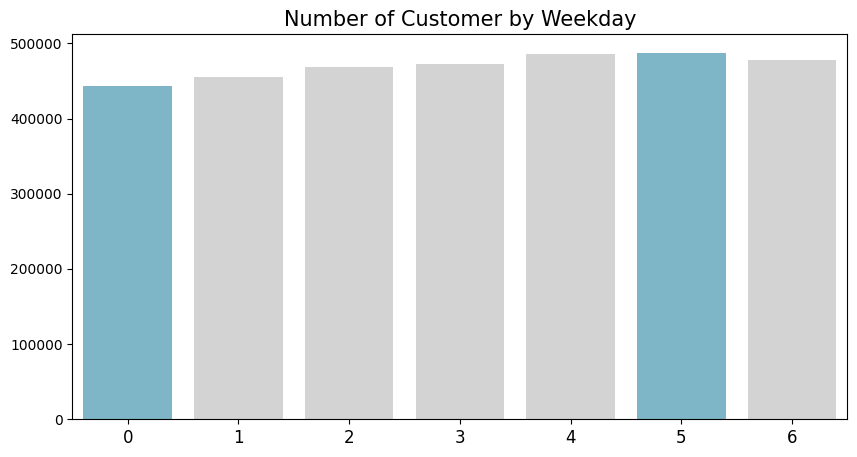

In [ ]:
plt.figure(figsize=(10, 5))

colors = ["#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="cnt_y",
    x="weekday_y",
    data=sum_day_df.sort_values(by="cnt_y", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Weekday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Kondisi cuaca sangat berpengaruh terhadap jumlah penyewa sepeda yang dimana jumlah terbanya yaitu pada kondisi cuaca pertama
- jumlah penyewa sepeda mingguan yang paling banyak yaitu terdapat pada hari ke 5

## Conclusion

- Kesimpulan pertanyaan pertama:

Grafik menunjukkan bahwa kondisi cuaca memiliki pengaruh yang sangat signifikan terhadap jumlah pelanggan. Terdapat perbedaan yang mencolok antara kategori cuaca yang berbeda.
Kategori cuaca 1 (kemungkinan besar cuaca cerah atau kondisi ideal lainnya) memiliki jumlah pelanggan yang jauh lebih tinggi dibandingkan kategori lainnya. Jumlah pelanggan pada kategori ini mencapai lebih dari 2 juta, yang menunjukkan bahwa cuaca yang baik sangat mendorong kunjungan pelanggan.
Kategori cuaca 2 (kemungkinan cuaca berawan atau gerimis ringan) memiliki jumlah pelanggan yang lebih rendah, yaitu sekitar 800.000. Ini menunjukkan bahwa kondisi cuaca yang kurang ideal mengurangi jumlah kunjungan.
Kategori cuaca 3 (kemungkinan hujan atau salju) memiliki jumlah pelanggan yang sangat rendah, yaitu di bawah 200.000. Ini menegaskan bahwa cuaca buruk secara signifikan menghambat kunjungan pelanggan.
Tidak ada data untuk kategori cuaca 4, yang mungkin mengindikasikan bahwa kondisi cuaca ekstrem (seperti badai atau kondisi berbahaya lainnya) jarang terjadi atau tidak terdata.

Rekomendasi:

Mengingat pengaruh cuaca yang besar, perencanaan operasional harus disesuaikan dengan perkiraan cuaca. Misalnya, pada hari-hari dengan perkiraan cuaca cerah, staf dan sumber daya perlu ditingkatkan untuk menangani lonjakan pelanggan.
Pertimbangkan untuk menawarkan promosi atau penawaran khusus pada hari-hari dengan perkiraan cuaca buruk untuk menarik pelanggan meskipun kondisi cuaca tidak ideal.
Sediakan informasi cuaca yang jelas dan akurat kepada pelanggan. Ini dapat membantu mereka merencanakan kunjungan mereka dengan lebih baik.
Lakukan analisis lebih lanjut untuk memahami faktor-faktor lain yang mungkin mempengaruhi jumlah pelanggan selain cuaca. Misalnya, analisis data acara lokal, hari libur, atau kampanye pemasaran.
Pertimbangkan untuk mendiversifikasi layanan atau produk yang ditawarkan untuk mengurangi ketergantungan pada kondisi cuaca. Misalnya, menawarkan layanan pengiriman atau produk yang dapat dinikmati di dalam ruangan.
Sesuaikan manajemen inventaris dengan perkiraan cuaca. Pada hari-hari dengan perkiraan cuaca cerah, pastikan stok barang yang populer mencukupi. Pada hari-hari dengan perkiraan cuaca buruk, kurangi stok barang yang mudah rusak.
Dengan rekomendasi ini, diharapkan layanan dapat mengoptimalkan operasionalnya dan mengurangi dampak negatif dari kondisi cuaca buruk.

- Kesimpulan pertanyaan kedua:

Grafik menunjukkan pola kunjungan pelanggan yang cukup stabil sepanjang minggu. Tidak ada fluktuasi ekstrem, yang mengindikasikan bahwa layanan ini memiliki basis pelanggan yang konsisten.
Hari ke-5 (Jumat) dan hari ke-6 (Sabtu) menunjukkan jumlah pelanggan tertinggi, dengan perkiraan jumlah di atas 480.000 pelanggan. Ini menunjukkan bahwa akhir pekan adalah waktu puncak kunjungan.
Hari ke-0 (Minggu) dan hari ke-1 (Senin) memiliki jumlah pelanggan yang relatif lebih rendah, yaitu di bawah 450.000 pelanggan. Meskipun demikian, perbedaan dengan hari-hari lain tidak terlalu signifikan.
Perbedaan persentase antara hari tersibuk (Jumat/Sabtu) dan hari dengan jumlah pelanggan terendah (Minggu/Senin) adalah sekitar 7-8%. Ini menunjukkan bahwa meskipun ada variasi, perbedaan tersebut tidak terlalu besar.
Secara keseluruhan, tren menunjukkan distribusi pelanggan yang merata sepanjang minggu, dengan sedikit peningkatan di akhir pekan.

Rekomendasi:

Mengingat akhir pekan adalah waktu puncak, pastikan staf dan sumber daya (misalnya, inventaris, kapasitas layanan) dioptimalkan untuk menangani lonjakan pelanggan pada hari-hari tersebut.
Meskipun perbedaan jumlah pelanggan tidak terlalu besar, pertimbangkan untuk mengadakan promosi khusus pada hari-hari kerja (Senin-Kamis) untuk menarik lebih banyak pelanggan dan meratakan distribusi kunjungan.
Lakukan analisis lebih lanjut untuk memahami faktor-faktor yang mempengaruhi pola kunjungan. Misalnya, analisis data cuaca, acara lokal, atau kampanye pemasaran yang mungkin mempengaruhi jumlah pelanggan.
Gunakan data historis ini untuk memprediksi jumlah pelanggan di masa depan dan merencanakan kebutuhan staf, inventaris, dan sumber daya lainnya secara proaktif.
Jika promosi atau perubahan operasional dilakukan, evaluasi efektivitasnya secara berkala untuk memastikan bahwa mereka mencapai tujuan yang diinginkan.
Dengan rekomendasi ini, diharapkan layanan dapat mengoptimalkan operasionalnya dan meningkatkan kepuasan pelanggan.